In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
df_cardio = pd.read_csv("cardio_train.csv", sep=",", index_col=0)

In [6]:
df_cardio

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [7]:
df_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# 1. Análise geral dos dados

In [8]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [9]:
17664.000000 / 365

48.394520547945206

In [10]:
df_cardio.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [11]:
df_cardio.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# 2. Análise exploratória dos dados (EDA)

In [12]:
df_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

### 2.1. Dados numéricos

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Box(x=df_cardio["age"]/365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"]/365, name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"]/365, name="Pressão sanguínea sistólica"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"]/365, name="Pressão sanguínea diastólica"), row=4, col=1)


fig.update_layout(height=700)
fig.show()

### 2.2. Dados categóricos


In [14]:
df_cardio["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [15]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Bar(y=df_cardio["gender"].value_counts(), x=["Feminino", "Masculino"], name="Genero"), row=1,col=1)  


fig.update_layout(template="plotly_dark",height=700)
fig.show()

# 3. Treinando modelo de ML

### 3.1. Preparação do modelo

In [16]:
y = df_cardio["cardio"]
x = df_cardio.loc[:, df_cardio.columns != 'cardio']


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)



In [18]:
x_train

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
64334  91821  21968       2     156    60.0    200   1200            1     1   
4550    6439  20280       1     159    60.0    120     80            1     1   
24098  34438  20411       2     170    90.0    145     90            2     1   
34222  48898  16767       1     160   105.0    130     80            1     1   
36016  51423  19933       2     176    94.0    140     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
37194  53137  16001       2     170    75.0    150     80            1     1   
6265    8918  23209       2     162    73.0    160     90            1     1   
54886  78302  23589       1     169    74.0    120     80            1     1   
860     1197  18227       1     167    70.0    120     80            1     1   
15795  22556  15114       2     177    64.0    120     80            1     1   

       smoke  alco  active  
64334      0     0       1  
4550       0     0       0  
24098      0     0       1  
34222      0     0       0  
36016      0     0       0  
...      ...   ...     ...  
37194      1     0       1  
6265       0     0       1  
54886      0     0       1  
860        0     0       0  
15795      0     0       1  

[46900 rows x 12 columns]

In [19]:
y_test

46730    1
48393    1
41416    1
34506    1
43725    0
        ..
34382    1
65822    1
4116     1
31281    1
34561    1
Name: cardio, Length: 23100, dtype: int64

### 3.2. Treinamento do modelo

In [20]:
from sklearn.ensemble import RandomForestClassifier

ml_model = RandomForestClassifier(n_estimators=20, n_jobs=4, max_depth=4,)
ml_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=4)

In [21]:
x_test.iloc[0].to_frame().transpose()

id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
46730  66728.0  21770.0     1.0   156.0    64.0  140.0   80.0          2.0   

       gluc  smoke  alco  active  
46730   1.0    0.0   0.0     1.0

In [22]:
ml_model.predict(x_test.iloc[0].to_frame().transpose())

array([1], dtype=int64)

In [23]:
y_train.iloc[1]

0

### 3.3 Avaliação do modelo

In [24]:
predictions = ml_model.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     11506
           1       0.77      0.66      0.71     11594

    accuracy                           0.73     23100
   macro avg       0.74      0.73      0.73     23100
weighted avg       0.74      0.73      0.73     23100

[[9240 2266]
 [3913 7681]]


### 3.4. Feature importance

In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ml_model, x_test, y_test, n_repeats=10, n_jobs=2) 
sorted_idx = result.importances_mean.argsort()

C:\Users\tary.nascimento\AppData\Local\Temp\ipykernel_6192\1191874723.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



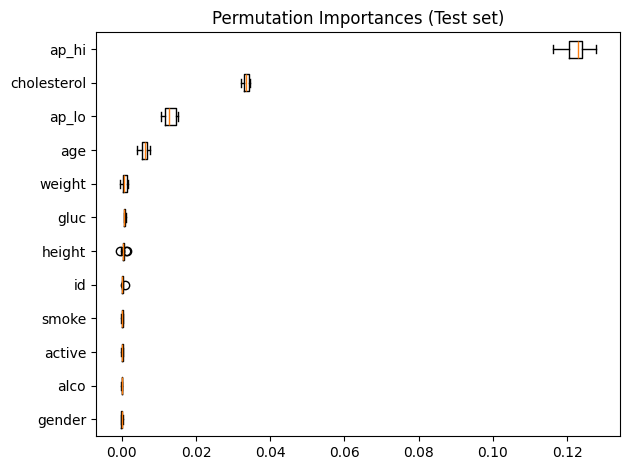

In [27]:
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (Test set)")
fig.tight_layout()
plt.show()

In [28]:
import shap
explainer = shap.TreeExplainer(ml_model)

c:\Users\tary.nascimento\Downloads\previsao-doencas-cardiacas\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [29]:
shap_values = explainer.shap_values(x)

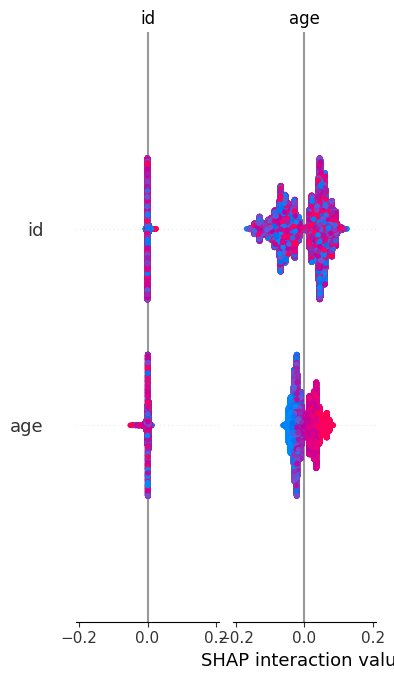

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
# Visualizando a importância das variáveis com SHAP
shap.summary_plot(shap_values, x, plot_type="bar")



Acurácia: 0.7325


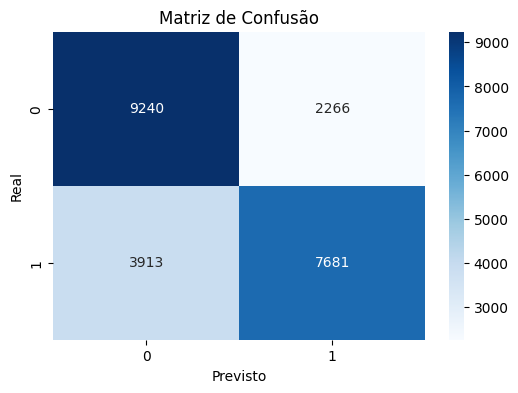


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     11506
           1       0.77      0.66      0.71     11594

    accuracy                           0.73     23100
   macro avg       0.74      0.73      0.73     23100
weighted avg       0.74      0.73      0.73     23100



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Previsões
y_pred = ml_model.predict(x_test)

# Acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Classification Report
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


# MELHORIA DO MODELO DE PREVISÃO

### 1. Recriar o modelo com peso balanceado (para focar mais na classe 1 - Doentes)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Recriando o modelo com pesos balanceados
ml_model = RandomForestClassifier(
    n_estimators=100,     # mais árvores
    max_depth=8,          # mais profundo (mas controlado)
    class_weight='balanced',  # importante: dar mais peso para classe minoritária
    random_state=42,
    n_jobs=-1
)

# Treinando o novo modelo
ml_model.fit(x_train.drop('id', axis=1), y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=42)

### 2. Avaliar novamente

Acurácia: 0.7378


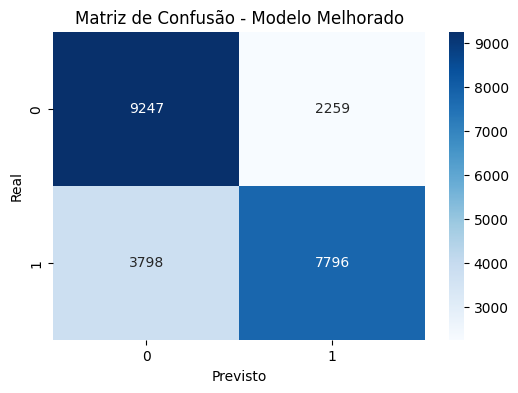


Relatório de Classificação (modelo melhorado):
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     11506
           1       0.78      0.67      0.72     11594

    accuracy                           0.74     23100
   macro avg       0.74      0.74      0.74     23100
weighted avg       0.74      0.74      0.74     23100



In [37]:
# Previsão
y_pred = ml_model.predict(x_test.drop('id', axis=1))

# Acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão - Modelo Melhorado')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Classification Report
print("\nRelatório de Classificação (modelo melhorado):")
print(classification_report(y_test, y_pred))


###  3. Explicação com SHAP novamente

In [38]:
import shap

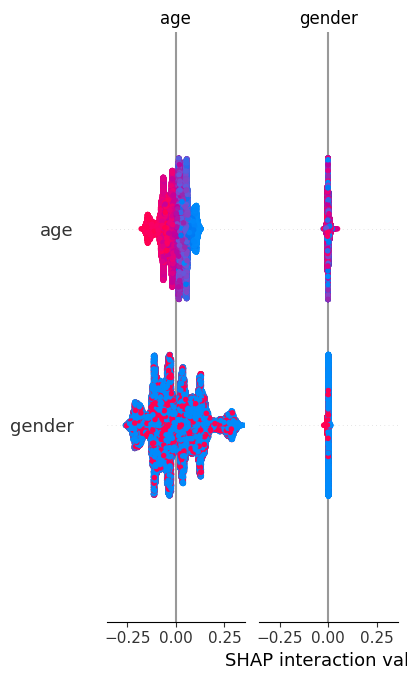

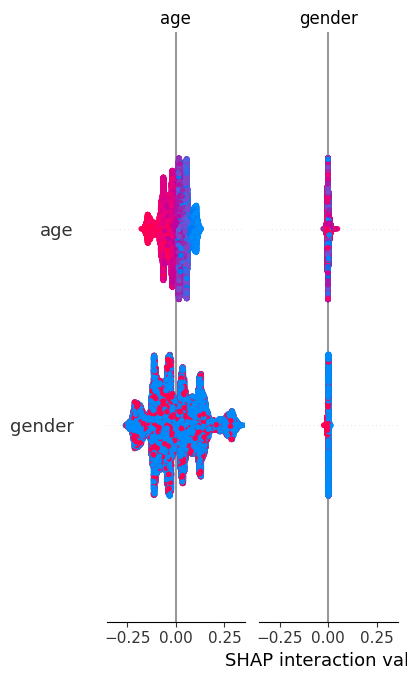

In [39]:
# Novo explainer
explainer = shap.TreeExplainer(ml_model)

# Novo shap_values
shap_values = explainer.shap_values(x.drop('id', axis=1))

# Plots
shap.summary_plot(shap_values, x.drop('id', axis=1), plot_type="bar")
shap.summary_plot(shap_values, x.drop('id', axis=1))

# OTIMIZAR A RANDOM FOREST USANDO GRIDSEARCHCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [41]:
# Definindo o modelo base
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [42]:
# Definindo o grid de hiperparâmetros que queremos testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
# Definindo o GridSearch
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    n_jobs=-1,               # usa todos os processadores
    verbose=2,
    scoring='f1'             # foca em otimizar o F1-Score
)


In [44]:
# Executando o GridSearch
grid_search.fit(x_train.drop('id', axis=1), y_train)

# Melhor combinação encontrada
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


### Depois, Treinar e Avaliar o Melhor Modelo

Acurácia (Best Model): 0.7390


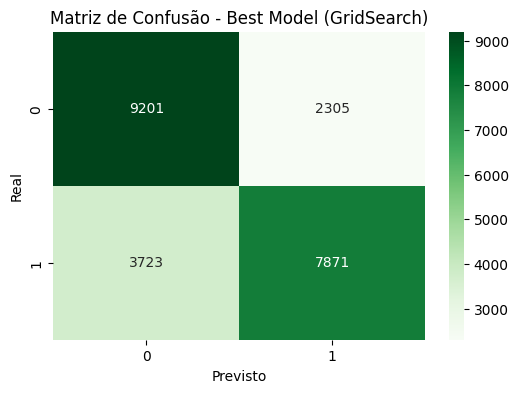


Relatório de Classificação (Best Model):
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     11506
           1       0.77      0.68      0.72     11594

    accuracy                           0.74     23100
   macro avg       0.74      0.74      0.74     23100
weighted avg       0.74      0.74      0.74     23100



In [45]:
# Usando o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Prevendo
y_pred_best = best_model.predict(x_test.drop('id', axis=1))

# Avaliando
print(f"Acurácia (Best Model): {accuracy_score(y_test, y_pred_best):.4f}")

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title('Matriz de Confusão - Best Model (GridSearch)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\nRelatório de Classificação (Best Model):")
print(classification_report(y_test, y_pred_best))
